# Matemática para Ciencia de los Datos
# Trabajo Práctico 5

Profesor: Juan Luis Crespo Mariño (basado en trabajo previo de Luis Alexánder Calvo Valverde)

Instituto Tecnológico de Costa Rica,

Programa Ciencia de Datos

---

Fecha de entrega: 26 de agosto de 2025, hora límite las 6:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ).

Estudiante:
1. **Roberto Baltodano**


---

**Pregunta 1 (30 puntos)**

Para la siguiente función:


$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$



Realice lo siguiente:

En python, genere un gráfico, puede usar la función meshgrid (Use la biblioteca plotly).








In [6]:
%matplotlib inline

import numpy as np
import plotly.graph_objects as go

# Funcion f2 definida como lambda
f2 = lambda x1, x2: x1 * np.exp(-(x1**2) - (x2**2))

# Se crea un grid con numpy usando la funcion linspace
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f2(X1, X2)

# Manejo del grafico usando la libreria plotly
fig = go.Figure(data=[go.Surface(z=Z, x=X1, y=X2, colorscale="Viridis")])

fig.update_layout(
    scene=dict(
        xaxis_title="x₁",
        yaxis_title="x₂",
        zaxis_title="z"
    ),
    autosize=True,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

---

**Pregunta 2 (20 puntos)**

Para la siguiente función multivariable: $z=f\left(x,y\right)=3x^{2}+2y^{4}$, calcule el vector gradiente manualmente.  Evalúelo para el punto $P_{1}=\left(7.4,-6.3\right)$. Luego calcule la magnitud (norma Euclidiana) del vector gradiente para el punto. Finalmente normalice el vector resultante.

--No se require programación en python--.



$$
f(x,y) = 3x^{2} + 2y^{4}
$$

$$
\frac{\partial f(x,y)}{\partial x} 
= 3 \cdot 2x^{2-1} + 0 
= 6x
$$

$$
\frac{\partial f(x,y)}{\partial y} 
= 0 + 2 \cdot 4y^{4-1} 
= 8y^{3}
$$

$$
\nabla f = (6x,\, 8y^{3})
$$

Evaluado en P1=(7.4, -6.3)
$$
f(7.4, -6.3) 
= \left( 6 \cdot 7.4,\; 8(-6.3)^{3} \right) 
= (44.4,\; -2000.376)
$$

Calculo de la norma euclidea
$$
\|\nabla f\| = \sqrt{(6x)^{2} + (8y^{3})^{2}}
= \sqrt{36x^{2} + 64y^{6}}
$$

Se puede simplificar usando el máximo común divisor

$$
\sqrt{36x^{2} + 64y^{6}}
= \sqrt{4 \big( 9x^{2} + 16y^{6} \big)}
= 2\sqrt{9x^{2} + 16y^{6}}
$$

Vector gradiente normalizado

$$
\widehat{\nabla f} 
= \left( \frac{6x}{2\sqrt{9x^{2}+16y^{6}}}, \, \frac{8y^{3}}{2\sqrt{9x^{2}+16y^{6}}} \right)
$$

$$
= \left( \frac{3x}{\sqrt{9x^{2}+16y^{6}}}, \, \frac{4y^{3}}{\sqrt{9x^{2}+16y^{6}}} \right)
$$

---

**Pregunta 3 (20 puntos)**

Calcule el vector gradiente $\nabla f$ para la siguiente función multi-variable $f: \mathbb{R}^2\rightarrow\mathbb{R}$.

$f(x,y) = x^3+y^2$  

    * Además, evalúe en
$\begin{bmatrix}1\\1\end{bmatrix}$.






$$
f(x,y) = x^{3} + y^{2}
$$

$$
\frac{\partial f(x,y)}{\partial x} 
= 3x^{3-1} + 0 
= 3x^{2}
$$

$$
\frac{\partial f(x,y)}{\partial y} 
= 0 + 2y^{2-1} 
= 2y
$$

$$
\nabla f = (3x^{2},\, 2y)
$$

Evaluado en P1 = (1,1)

$$
f(1,1) = (3,\,2)
$$

---

**Pregunta 4 (30 puntos)**

La ténica del SVD puede ser utiliada para la compresión de imágenes. Por ejemplo, una imagen **[1]** de $m×n$ pixels en escala de grises puede ser representada como una matriz $A \in R^{m×n}$ cuyos elementos $a_{ij}$ representan la intensidad del pixel $(i, j)$. En particular, una imagen contiene mucha información redundante, es decir, que puede ser eliminada sin que el efecto visual sea notable.

Se podría sustituir la matriz $A$ por otra matriz $B$ de rango menor.

Consideremos:

Teorema: Sean $\sigma_{1} \geq \sigma_{2} \geq \cdots \geq \sigma_{r} > 0 $, valores singulares no  nulos de $A \in C^{m×n}$. Entonces para cada $k < r$, la distancia desde $A$ al conjunto de matrices de rango $k$ en la norma $\left\Vert \cdot \right\Vert _{2} $ es:

$$\sigma_{k+1} = \min\limits_{rank(B)=k} \left\Vert A - B \right\Vert _{2}$$

Por tanto, si $A = UDV^T $ es la descomposición en valores singulares de $A$, la matriz de rango $k$ de mejor aproximación a $A$ es:

$$B = U
\begin{bmatrix} D  &  0      \\
                0  &  0
\end{bmatrix} V^T , D = diag(\sigma_1, \sigma_2, \cdots , \sigma_k)$$

Si $U_k$ y $V_k$ son las matrices compuestas por las primeras $k$ columnas de $U$ y $V$,  respectivamente, entonces se puede decir que (fórmula **f_1**):

$$B = U_k D V_{k}^{T}$$

logrando codificar la imagen aproximada por medio de matrices de menor tamaño.

Por otra parte, las imágenes en color **[2]** se representan en Python como matrices numéricas tridimensionales, la tercera dimensión para representar los valores de color (rojo, verde azul). Sin embargo, el método SVD es aplicable a matrices bidimensionales. Así que tenemos que encontrar una manera de convertir la matriz tridimensional en matrices bidimensionales, aplicar SVD y reconstruirla como una matriz  tridimensional. Hay dos maneras de hacerlo. Mostraremos ambos métodos a continuación.
1. método de remodelación: Este método implica aplanar la tercera dimensión de la matriz de imágenes en la segunda dimensión utilizando el método de reshape.
1. Método de capa:   Este método trata una imagen en color como una pila de 3 imágenes bidimensionales separadas (capas roja, azul y verde). Se aplica la reconstrucción SVD truncada en cada capa bidimensional por separado y luego se vuelven a juntar las capas reconstruidas.

Investigue uno de estos métodos y aplique un procedimiento similar al del cuaderno visto en clase, utilizando la figura adjunta "Imagen1.jpg" (**procesando la imagen a color, NO en escala de grises**).


1. Cargue la imagen adjunta, "Perrita.jpg".
1. Muestre su contenido en pantalla.
1. Calcule la descomposicíón en valores singulares.
1. Sea $k$ los primeros $k_{ésimos}$ primeros valores singulares. Para $k \in [5, 10, 50, 100, 300, 700, 900]$, haga:
    1. Trunque las matrices U, D y V dejando sólo aquellas columnas que corresponden a los valores singulares seleccionados ($k$), obteniendo las matrices $U_k$, $D$ y $V_k$.
    1. Muestre el tamaño de cada una de las matrices.
    1. Calcule la matriz $B$ que aproxima a $A$ segúnn la fórmula **f_1** (ver arriba).
    1. Muestre la imagen correspondiente al contenido de la matriz $B$.
    
**[1]** Texto base: https://w3.ual.es/~andrei/Practicas/practica14.pdf

**[2]** Texto base de Ramesh Putalapattu.

Detalles de img:  <PIL.Image.Image image mode=RGB size=720x960 at 0x119692D50>
Rojos


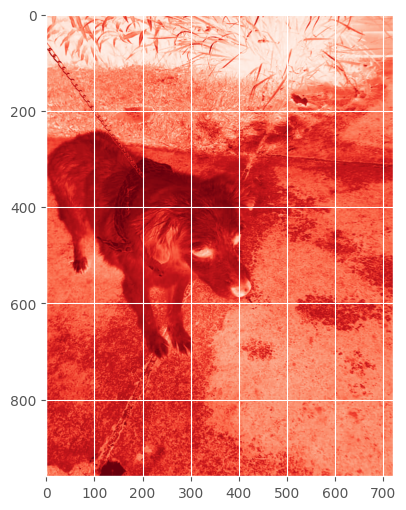

Verdes


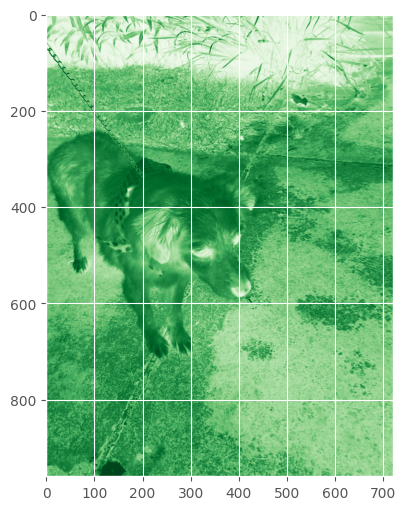

Azules


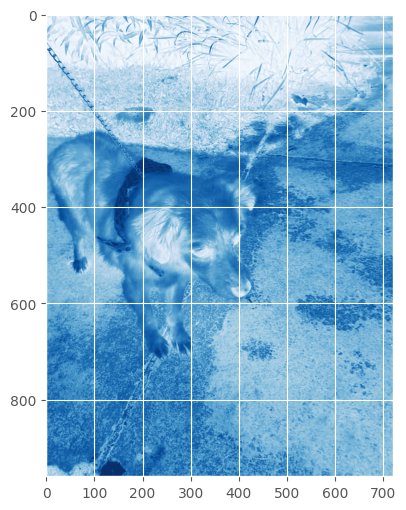

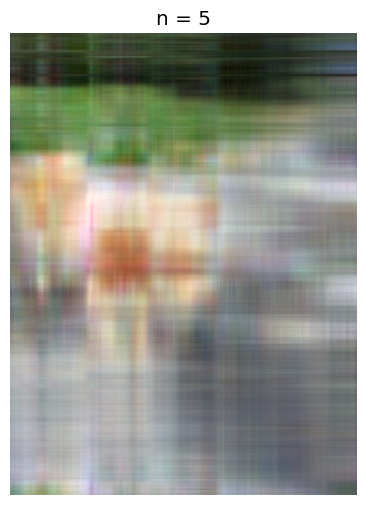

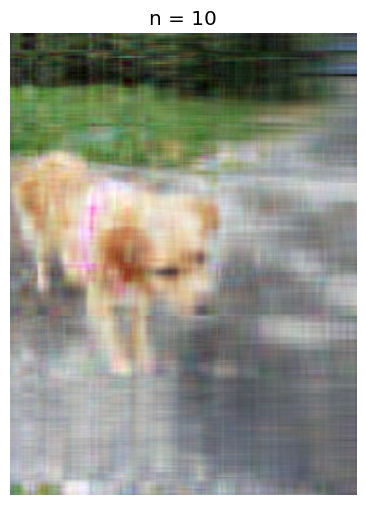

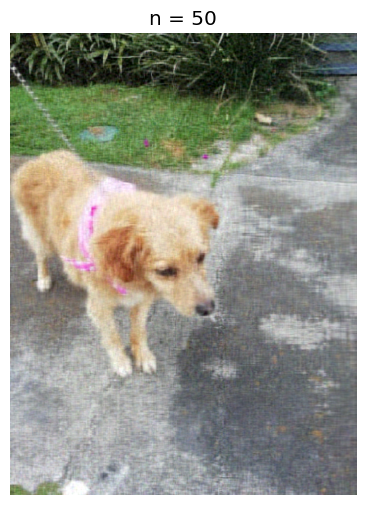

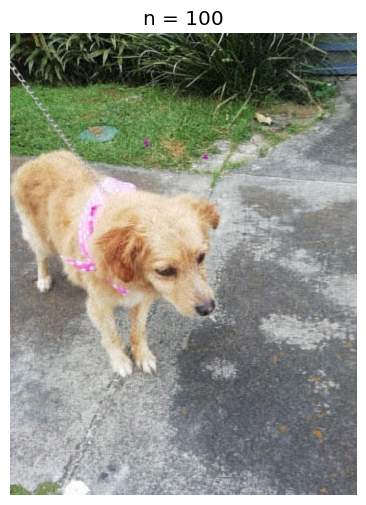

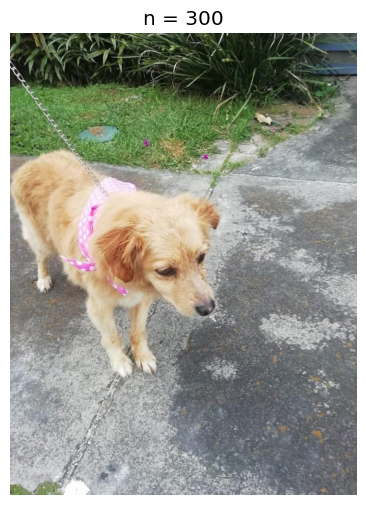

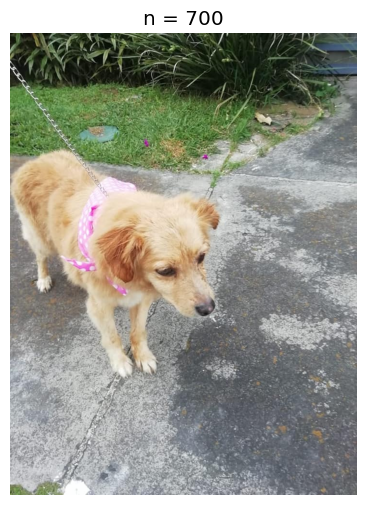

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
img = Image.open('Perrita.jpg').convert("RGB")
print("Detalles de img: ", img)

A = np.array(img, dtype=np.float64)

# Opcion escogida: #2 Dividir las 3 matrices y aplicar la SVD a las 3 en paralelo
R = A[:, :, 0]
G = A[:, :, 1]
B = A[:, :, 2]

# Muestra la imagen de las 3 diferentes matrices
# Rojo
print("Rojos")
plt.figure(figsize=(9, 6))
plt.imshow(R, cmap='Reds')
plt.show()

# Verde
print("Verdes")
plt.figure(figsize=(9, 6))
plt.imshow(G, cmap='Greens')
plt.show()

# Azul
print("Azules")
plt.figure(figsize=(9, 6))
plt.imshow(B, cmap='Blues')
plt.show()

# Aplico la SVD para las 3 diferentes matrices RGB
UR, DR, VR = np.linalg.svd(R)
UG, DG, VG = np.linalg.svd(G)
UB, DB, VB = np.linalg.svd(B)


for i in [5, 10, 50, 100, 300, 700]:
    # Se hace la reconstruccion para cada valor del bucle para los 3 canales RGB
    reconstimgR = UR[:, :i] @ np.diag(DR[:i]) @ VR[:i, :]
    reconstimgG = UG[:, :i] @ np.diag(DG[:i]) @ VG[:i, :]
    reconstimgB = UB[:, :i] @ np.diag(DB[:i]) @ VB[:i, :]

    # Se combinan las matrices 
    reconstimg = np.stack((reconstimgR, reconstimgG, reconstimgB), axis=2)

    # Se clipean los valores para que sean de 0 a 255 y se convierten a un unsigned integer 8 para mostrarlo
    reconstimg = np.clip(reconstimg, 0, 255).astype(np.uint8)

    plt.figure(figsize=(9, 6))
    plt.imshow(reconstimg)
    title = "n = %s" % i
    plt.title(title)
    plt.axis("off")
    plt.show()